# ***Presentación***

## **Tecnicatura Universitaria en Inteligencia Artificial**

### Trabajo Práctico - Minería de Datos

#### Support Vector Machines y Random Forest

---

**Equipo**:
- Revello Simon
- Giampaoli Fabio

**Fecha**: 24/11/2023

---

## ***Objetivo***


El objetivo de este trabajo practico es integrar los conocimientos adquiridos en las unidades 5 y 6
en un problema real asociado a la determinación del color de los granos de café mediante la
medición atributos característicos.

# ***Entorno***

En este bloque se importaran los modulos y conjuntos de datos inciales que seran de utilidad para el desarrollo de funcionalidades especificas de los problemas.

## Librerias

In [206]:
# procesamiento
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from scipy.stats import boxcox

# visualizacion
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from ipywidgets import widgets, interact

# modelos
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.metrics import ConfusionMatrixDisplay, mean_absolute_error, mean_squared_error, r2_score, roc_auc_score
from sklearn import svm
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

## Datasets

Debe asegurarse de que la ruta a los archivos sea la correcta acorde a su entorno. En este caso cargamos ambos datasets al mismo tiempo en el entorno.

In [98]:
coffee = pd.read_csv('CoffeeRatings.csv', delimiter=';')

# ***Ejercicios***

## **Primer ejercicio**

---

Descargar el conjunto de CoffeeRatings.csv, para realizar el trabajo práctico. Analizar
los atributos del conjunto de datos (distribuciones, valores, outliers, tipos de datos, etc.)

---

### Informacion basica

In [99]:
coffee.head()

,Scores_Aroma,Scores_Flavor,Scores_Aftertaste,Scores_Acidity,Scores_Body,Scores_Balance,Scores_Uniformity,Scores_Sweetness,Scores_Moisture,Scores_Total,Color
0,85,85,80,80,80,80,100,100,12,8692,Green
1,85,817,80,775,80,80,100,100,12,8642,Green
2,833,80,80,80,775,80,100,100,11,8608,Blue-Green
3,80,80,80,767,775,80,100,100,11,8542,Blue-Green
4,80,792,775,775,80,775,100,100,11,8492,Green


In [100]:
coffee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 835 entries, 0 to 834
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Scores_Aroma       835 non-null    int64 
 1   Scores_Flavor      835 non-null    int64 
 2   Scores_Aftertaste  835 non-null    int64 
 3   Scores_Acidity     835 non-null    int64 
 4   Scores_Body        835 non-null    int64 
 5   Scores_Balance     835 non-null    int64 
 6   Scores_Uniformity  835 non-null    int64 
 7   Scores_Sweetness   835 non-null    int64 
 8   Scores_Moisture    835 non-null    int64 
 9   Scores_Total       835 non-null    int64 
 10  Color              835 non-null    object
dtypes: int64(10), object(1)
memory usage: 71.9+ KB


In [101]:
coffee.describe()

,Scores_Aroma,Scores_Flavor,Scores_Aftertaste,Scores_Acidity,Scores_Body,Scores_Balance,Scores_Uniformity,Scores_Sweetness,Scores_Moisture,Scores_Total
count,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000
mean,623.726946,615.576048,611.677844,617.116168,610.330539,611.276647,191.758084,157.644311,8.231138,6675.440719
std,273.720152,274.245606,263.865747,274.480062,276.366482,276.300203,257.583828,203.439529,5.130245,3007.519639
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,717.000000,708.000000,683.000000,717.000000,708.000000,692.000000,100.000000,100.000000,1.000000,7792.000000
50%,758.000000,742.000000,733.000000,742.000000,742.000000,742.000000,100.000000,100.000000,11.000000,8183.000000
75%,775.000000,767.000000,758.000000,767.000000,767.000000,767.000000,100.000000,100.000000,12.000000,8325.000000
max,875.000000,883.000000,867.000000,875.000000,842.000000,858.000000,933.000000,933.000000,17.000000,9058.000000


In [102]:
def graficar_datos_faltantes(df):
    df = df.copy()
    total = df.shape[0]
    nulos = df.isnull().sum() # obtiene todos los nulos

    df_grafico = pd.DataFrame({'total': total, 'nulos': nulos}) # genera un dataframe de forma temporal

    plt.figure(figsize=(10, 6))
    sns.barplot(y=df_grafico.index, x=df_grafico['total'], color='violet', alpha=0.5) # bar que muestra todos los registros
    bar_nulos = sns.barplot(y=df_grafico.index, x=df_grafico['nulos'], color='blue', alpha=0.5) # bar que muestra solo los nulos

    plt.xlabel('Cantidad de registros', fontsize=12)
    plt.ylabel('Variables', fontsize=12)
    plt.title('Cantidad de datos faltantes por variable', fontsize=16)

    # Agrega la cantidad de valores nulos a cada barra
    for i, v in enumerate(df_grafico['nulos']):
        bar_nulos.text(v + 0.2, i + .2, str(v), color='black', fontweight='bold')

    plt.show()

def graficar_elementos_unicos(df):
    n_unicos = df.nunique() # obtiene el numero de valores unicos de cada variable

    plt.figure(figsize=(10, 6))
    bar_unicos = sns.barplot(x=n_unicos.index, y=n_unicos.values, alpha=0.8) # grafico en barplot

    plt.ylabel('Cantidad de elementos únicos', fontsize=12)
    plt.xlabel('Variables', fontsize=12)
    plt.title('Cantidad de elementos únicos por variable', fontsize=16)
    plt.xticks(rotation='vertical')

    # Agrega la cantidad de elementos únicos a cada barra
    for i, v in enumerate(n_unicos):
        bar_unicos.text(i, v + 0.2, str(v), color='black', fontweight='bold', ha='center')

    plt.show()


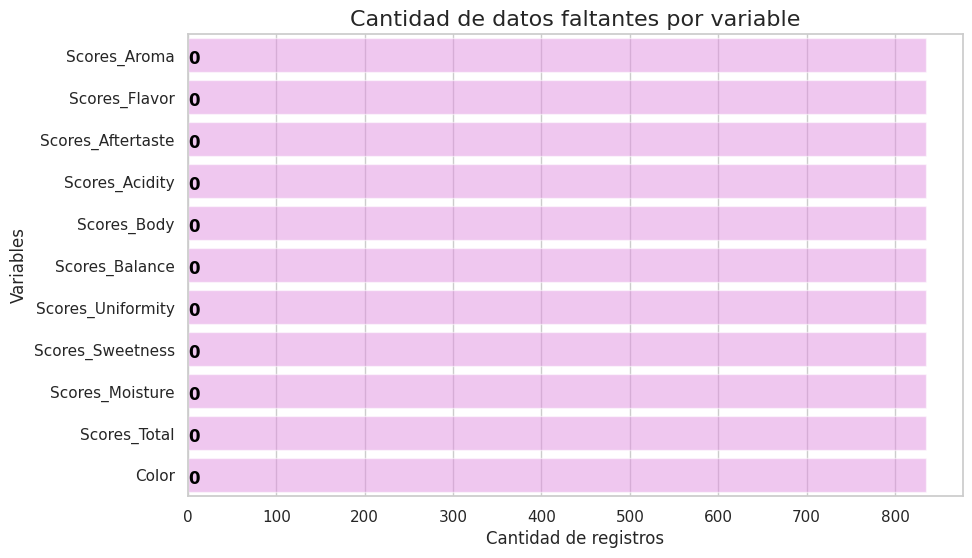

In [103]:
graficar_datos_faltantes(coffee)

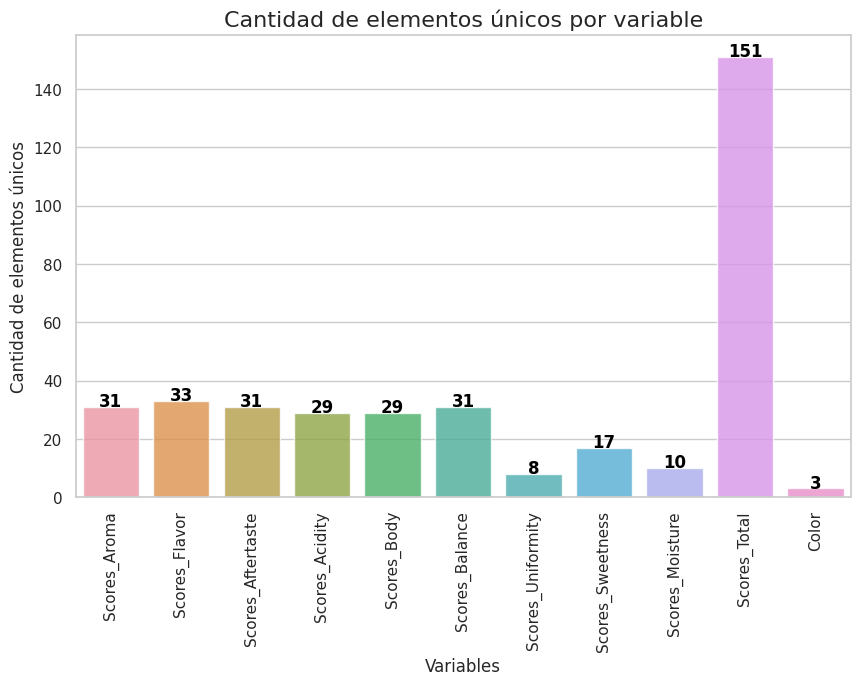

In [104]:
graficar_elementos_unicos(coffee)

### Distribuciones por clase

In [105]:
def create_plots(df, explanatory_var, class_var, class_value):
    if class_value != 'Todas': # aniade la opcion de ver todas los estados a la vez
        df = df[df[class_var] == class_value]

    fig, axs = plt.subplots(3, 1, figsize=(8,6))

    # scatter unidimensional
    sns.stripplot(x=explanatory_var, y=[""]*len(df), hue=class_var, data=df, jitter=True, ax=axs[0])
    axs[0].set_title('Distribución de ' + explanatory_var + ' con respecto a ' + class_var)
    axs[0].legend('')
    axs[0].set_xlabel("")

    # caja de metricas de distribucion
    sns.boxplot(y=class_var, x=explanatory_var, data=df, orient='h', ax=axs[1])
    axs[1].legend('')
    axs[1].set_xlabel("")

    # densidad de datos
    sns.kdeplot(data=df, x=explanatory_var, hue=class_var, fill=True, ax=axs[2])
    axs[2].set_xlabel(explanatory_var)
    axs[2].legend('')

    plt.tight_layout()
    plt.show()

# menu de seleccion de variable
explanatory_var_widget = widgets.Dropdown(
    options=[col for col in coffee.columns if col not in ['Color']],
    description='Explicativa:',
)

# menu de seleccion de estado
class_value_widget = widgets.Dropdown(
    options=['Todas'] + list(coffee['Color'].unique()),
    description='Color:',
)

# genera interacion
interact(create_plots, df=widgets.fixed(coffee), explanatory_var=explanatory_var_widget, class_var=widgets.fixed('Color'), class_value=class_value_widget)


interactive(children=(Dropdown(description='Explicativa:', options=('Scores_Aroma', 'Scores_Flavor', 'Scores_A…

<function __main__.create_plots(df, explanatory_var, class_var, class_value)>

### Distribuciones por variable

In [106]:
def create_dist(df, variable):
    # Crear un diccionario de colores unicos para cada variable
    color_dict = {col: color for col, color in zip(df.columns, sns.color_palette("hsv", len(df.columns)))}

    fig, ax = plt.subplots(figsize=(10, 4))

    # Boxplot
    bp = ax.boxplot(df[variable], patch_artist=True, vert=False)
    bp['boxes'][0].set_facecolor(color_dict[variable])
    bp['boxes'][0].set_alpha(0.7)

    # Violin plot (nubes)
    vp = ax.violinplot(df[variable], points=500, showmeans=False, showextrema=False, showmedians=False, vert=False)
    vp['bodies'][0].get_paths()[0].vertices[:, 1] = np.clip(vp['bodies'][0].get_paths()[0].vertices[:, 1], 0.8, 1.2)
    vp['bodies'][0].set_color(color_dict[variable])
    vp['bodies'][0].set_alpha(0.25)

    # Scatter plot (lluvia)
    y = np.full(len(df[variable]), 0.75) + np.random.uniform(low=-.05, high=.05, size=len(df[variable]))
    ax.scatter(df[variable], y, s=8, color=color_dict[variable], alpha=0.5)

    # Configurar títulos y etiquetas
    ax.set_title(variable)
    ax.set_yticks([])
    ax.set_xlabel("Value")

    plt.show()

# Crear selector de variable
variable_widget = widgets.Dropdown(
    options=[col for col in coffee.columns if col != 'Color'], # no incluyo state por que es categoria
    description='Variable:',
)

# Usar interact para crear la actualizar el grafico en un cambio
interact(create_dist, df=widgets.fixed(coffee), variable=variable_widget)


interactive(children=(Dropdown(description='Variable:', options=('Scores_Aroma', 'Scores_Flavor', 'Scores_Afte…

<function __main__.create_dist(df, variable)>

### Correlaciones

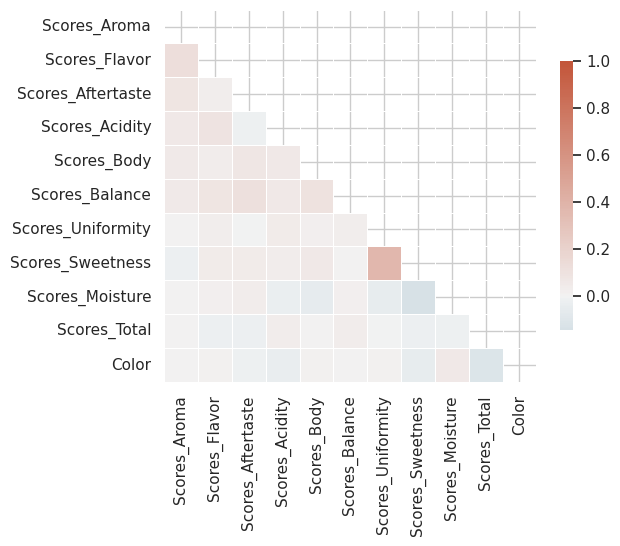

In [107]:

def grafico_correlacion(df, columnas):
    df_copy = df.copy()  # Hacer una copia del dataframe

    for columna in columnas:
        # Hacer un encoding de frecuencia para la variable categórica
        encoding = df_copy.groupby(columna).size()
        encoding = encoding / len(df_copy)
        df_copy[columna] = df_copy[columna].map(encoding)

    # Calcular la matriz de correlación
    corr = df_copy.corr()

    # Crear una máscara para el triángulo superior para no mostrar repetidos
    mask = np.triu(np.ones_like(corr, dtype=bool))

    # Generar un mapa de colores divergentes personalizado
    fig, ax = plt.subplots(figsize=(6, 7))
    cmap = sns.diverging_palette(230, 20, as_cmap=True)

    # Dibujar el mapa de calor con la máscara y la relación de aspecto correcta
    sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .5})

    # Mostrar el gráfico
    plt.show()

grafico_correlacion(coffee, ['Color']) # state es la unica categorica aqui

### Reduccion de dimensionalidad

columnas de coffee: 10


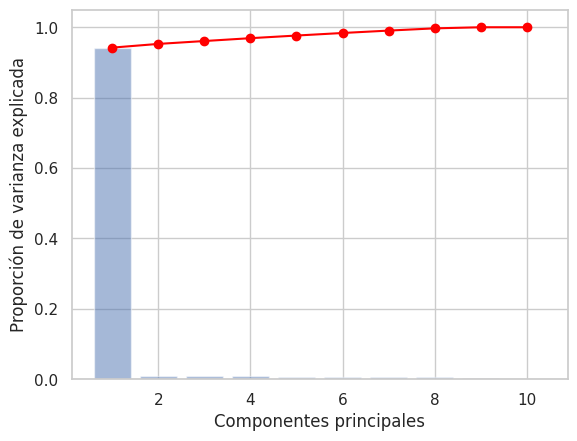

In [108]:
coffee_nums = coffee.iloc[:, :-1]

#--- Obtencion de los componentes ---#
pca = PCA()

pca_result = pca.fit_transform(coffee_nums)

pca_df = pd.DataFrame(data=pca_result, columns=[f"PC{i+1}" for i, _ in enumerate(coffee_nums.columns)]) # genera un df de las componentes

#--- Explicabilidad de los componentes ---#

varianza = np.cumsum(pca.explained_variance_ratio_)

acum = pd.DataFrame({"Component": pca_df.columns,
                     "EigenValues": pca.explained_variance_,
                     "PropVar": pca.explained_variance_ratio_,
                     "VarAcum": varianza}) # aca interesa la varianza acumulada, que se asemeja al porcentaje de explicabilidad de los datos


print(f'columnas de coffee: {coffee_nums.shape[1]}')

#--- grafico de explicabilidad ---#

plt.bar(range(1, 11), pca.explained_variance_ratio_, alpha=0.5, align="center")
plt.plot(range(1, 11), varianza, marker="o" ,color="red")
plt.ylabel("Proporción de varianza explicada")
plt.xlabel("Componentes principales")
plt.show()


In [109]:
coffee['Color'].unique()

array(['Green', 'Blue-Green', 'Bluish-Green'], dtype=object)

In [110]:
# Añade la columna 'Color' al DataFrame de las componentes principales
pca_df['Color'] = coffee['Color']

fig = px.scatter_3d(pca_df, x='PC1', y='PC2', z='PC3', color='Color')
fig.show()

### Separacion del conjunto

In [111]:
def split_data(df, target_column='Color', test_size=0.2):
    X = df.drop(target_column, axis=1)
    y = df[target_column]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

    return X_train, X_test, y_train, y_test

# Uso de la función
X_train, X_test, y_train, y_test = split_data(coffee)

In [112]:
print(X_train.shape, X_test.shape)

(668, 10) (167, 10)


### Modelo base de clasificacion

In [113]:
def train_and_evaluate(clf, X_train, X_test, y_train, y_test):
    # Entrena el modelo SVM
    clf.fit(X_train, y_train)

    # Realiza las predicciones
    y_train_pred = clf.predict(X_train)
    y_test_pred = clf.predict(X_test)

    # Calcula las probabilidades para el cálculo de AUC
    lb = LabelBinarizer()
    lb.fit(y_train)
    y_train_prob = clf.predict_proba(X_train)
    y_test_prob = clf.predict_proba(X_test)

    # accuracy para ambos sets
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    # f1 para ambos sets y clases
    train_f1 = f1_score(y_train, y_train_pred, average=None)
    test_f1 = f1_score(y_test, y_test_pred, average=None)

    # auc para ambos sets
    train_auc = roc_auc_score(lb.transform(y_train), y_train_prob, multi_class='ovr')
    test_auc = roc_auc_score(lb.transform(y_test), y_test_prob, multi_class='ovr')

    # Crear diccionario con los resultados para el conjunto de entrenamiento
    train_results = {
        'set': 'Train',
        'Green': {'accuracy': train_accuracy, 'f1': train_f1[0], 'auc': train_auc},
        'Blue-Green': {'accuracy': train_accuracy, 'f1': train_f1[1], 'auc': train_auc},
        'Bluish-Green': {'accuracy': train_accuracy, 'f1': train_f1[2], 'auc': train_auc},
    }

    # Crear diccionario con los resultados para el conjunto de prueba
    test_results = {
        'set': 'test',
        'Green': {'accuracy': test_accuracy, 'f1': test_f1[0], 'auc': test_auc},
        'Blue-Green': {'accuracy': test_accuracy, 'f1': test_f1[1], 'auc': test_auc},
        'Bluish-Green': {'accuracy': test_accuracy, 'f1': test_f1[2], 'auc': test_auc},
    }

    # Convertir los diccionarios a DataFrames
    train_df = pd.DataFrame(train_results).reset_index()
    test_df = pd.DataFrame(test_results).reset_index()

    result_clasif = pd.concat([train_df, test_df], axis=0)
    result_clasif.columns = ['metric', 'set', 'Green', 'Blue-Green', 'Bluish-Green']

    return result_clasif.sort_values(by='metric')


In [114]:
model = svm.SVC(probability=True)
train_and_evaluate(model, X_train, X_test, y_train, y_test)

,metric,set,Green,Blue-Green,Bluish-Green
0,accuracy,Train,0.817365,0.817365,0.817365
0,accuracy,test,0.808383,0.808383,0.808383
2,auc,Train,0.661797,0.661797,0.661797
2,auc,test,0.501239,0.501239,0.501239
1,f1,Train,0.000000,0.000000,0.899506
1,f1,test,0.000000,0.000000,0.894040


### Balanceo de clases

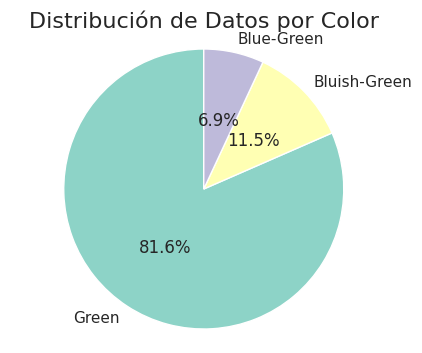

In [115]:
def graficar_proporcion_datos(df, column):
    value_counts = df[column].value_counts() # cantidad de calores de cada clase

    sns.set(style="whitegrid")
    fig, ax = plt.subplots(figsize=(5, 4))

    ax.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=90, pctdistance=0.5, colors=sns.color_palette('Set3')) # visualizacion en pie chart

    plt.title(f'Distribución de Datos por {column}', fontsize=16)
    plt.axis('equal')

    plt.show()

graficar_proporcion_datos(coffee, 'Color')

In [182]:
def over_classes(X, y):
    # Crear el objeto SMOTE
    smote = SMOTE(sampling_strategy={'Green': 546, 'Blue-Green': 480, 'Bluish-Green': 480}, random_state=42)
    X_res, y_res = smote.fit_resample(X, y)

    print(f'shape balanceado: {X_res.shape[0]}')

    # Devolver el DataFrame balanceado
    return X_res, y_res

# Llamada a la función
X_train_over, y_train_over = over_classes(X_train, y_train)
print(f'shape original: {coffee.shape[0]}')

shape balanceado: 1506
shape original: 835


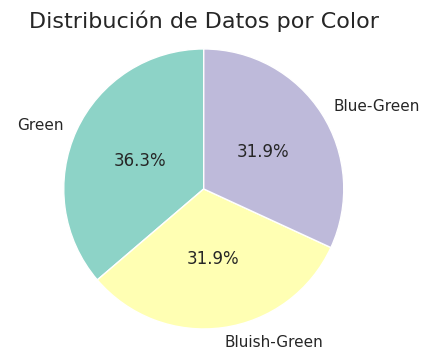

In [183]:
graficar_proporcion_datos(pd.concat([X_train_over, y_train_over], axis=1), 'Color')

In [184]:
model_over = svm.SVC(probability=True)
train_and_evaluate(model_over, X_train_over, X_test, y_train_over, y_test)

,metric,set,Green,Blue-Green,Bluish-Green
0,accuracy,Train,0.491368,0.491368,0.491368
0,accuracy,test,0.311377,0.311377,0.311377
2,auc,Train,0.707156,0.707156,0.707156
2,auc,test,0.527355,0.527355,0.527355
1,f1,Train,0.593528,0.453191,0.375155
1,f1,test,0.101266,0.173913,0.451613


In [187]:
from imblearn.under_sampling import RandomUnderSampler

def under_sample_classes(X, y):
    # Crear el objeto RandomUnderSampler
    rus = RandomUnderSampler(sampling_strategy={'Green': 100}, random_state=42)
    X_res, y_res = rus.fit_resample(X, y)

    print(f'shape balanceado: {X_res.shape[0]}')

    # Devolver el DataFrame balanceado
    return X_res, y_res

# Llamada a la función
X_train_under, y_train_under = under_sample_classes(X_train, y_train)
print(f'shape original: {coffee.shape[0]}')


shape balanceado: 222
shape original: 835


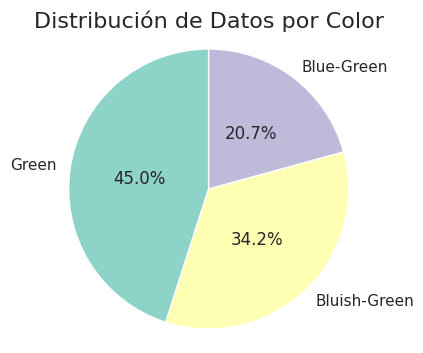

In [188]:
graficar_proporcion_datos(pd.concat([X_train_under, y_train_under], axis=1), 'Color')

In [189]:
model_under = svm.SVC(probability=True)
train_and_evaluate(model_under, X_train_under, X_test, y_train_under, y_test)

,metric,set,Green,Blue-Green,Bluish-Green
0,accuracy,Train,0.450450,0.450450,0.450450
0,accuracy,test,0.808383,0.808383,0.808383
2,auc,Train,0.698195,0.698195,0.698195
2,auc,test,0.579848,0.579848,0.579848
1,f1,Train,0.000000,0.000000,0.621118
1,f1,test,0.000000,0.000000,0.894040


### Valores Atipicos

In [220]:
def remove_outliers(X_train, X_test, y_train, y_test):
    Q1 = X_train.quantile(0.25)
    Q3 = X_train.quantile(0.75)
    IQR = Q3 - Q1

    # Solo mantener las filas en el conjunto de entrenamiento que están dentro del rango intercuartil
    train_mask = ((X_train >= (Q1 - 1.5 * IQR)) & (X_train <= (Q3 + 1.5 * IQR))).all(axis=1)
    X_train = X_train[train_mask]
    y_train = y_train[train_mask]

    # Solo mantener las filas en el conjunto de prueba que están dentro del rango intercuartil
    test_mask = ((X_test >= (Q1 - 1.5 * IQR)) & (X_test <= (Q3 + 1.5 * IQR))).all(axis=1)
    X_test = X_test[test_mask]
    y_test = y_test[test_mask]

    return X_train, X_test, y_train, y_test

# Uso de la función
X_train_out, X_test_out, y_train_out, y_test_out = remove_outliers(X_train, X_test, y_train, y_test)

In [221]:
model_out = svm.SVC(probability=True)
train_and_evaluate(model_out, X_train_out, X_test_out, y_train_out, y_test_out)

,metric,set,Green,Blue-Green,Bluish-Green
0,accuracy,Train,0.796875,0.796875,0.796875
0,accuracy,test,0.727273,0.727273,0.727273
2,auc,Train,0.574719,0.574719,0.574719
2,auc,test,0.622428,0.622428,0.622428
1,f1,Train,0.000000,0.000000,0.886957
1,f1,test,0.000000,0.000000,0.842105


### Escalado de datos

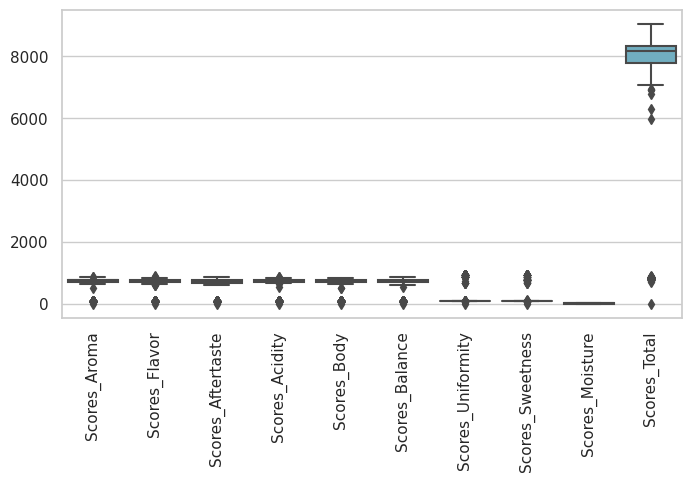

In [124]:
def show_distrbutions(df):
    plt.figure(figsize=(8, 4))
    sns.boxplot(df)
    plt.xticks(rotation=90)
    plt.show()

show_distrbutions(coffee)

In [125]:
def estandarize(df, scale_type):
  data = df.copy()

  scalers = {'Standard': StandardScaler(),
               'MinMax': MinMaxScaler(),
               'Robust': RobustScaler()}

  scaler = scalers[scale_type]

  data_scaled = scaler.fit_transform(data)
  data_standardized = pd.DataFrame(data_scaled, columns=data.columns)

  return data_standardized

# Function to perform the selected standardization method
def perform_standardization(method):

    df_scaled = estandarize(coffee_nums, method)
    show_distrbutions(df_scaled)

# Dropdown widget for selecting the standardization method
standardization_dropdown = widgets.Dropdown(
    options=['Standard', 'MinMax', 'Robust'],
    value='Standard',
    description='Method:',
    disabled=False,
)

# Define an interactive output widget
output = widgets.interactive_output(perform_standardization, {'method': standardization_dropdown})

# Display the widgets
display(standardization_dropdown, output)


Dropdown(description='Method:', options=('Standard', 'MinMax', 'Robust'), value='Standard')

Output()

## **Segundo ejercicio**

---

Realizar la predicción del atributo Color utilizando máquinas de vectores con kernel lineal
analizando el parámetro costo. Mostar los resultados sobre los conjuntos de test
(Precisión, Exhaustividad y Exactitud) utilizando validación cruzada con k =5

---

### Section

### Section

### Section

## **Tercer ejercicio**

---

Realizar la predicción del atributo Color utilizando máquinas de vectores con kernel
gaussiano analizando los parámetros costo y gama. Mostar los resultados sobre los
conjuntos de test (Precisión, Exhaustividad y Exactitud) utilizando validación cruzada con
k =5.

---

### Section

### Section

### Section

## **Cuarto ejercicio**

---

Realizar la predicción del atributo Color utilizando Random Forest analizando los
parámetros cantidad de estimadores y la máxima profundidad de los árboles. Mostar los
resultados sobre los conjuntos de test (Precisión, Exhaustividad y Exactitud) utilizando
validación cruzada con k =5.

---

### Section


### Section


### Section


# ***Conclusiones***